In [13]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import dill as pickle
import rescomp as rc
# from _common import *

#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='networkx')
warnings.filterwarnings('ignore')

# Reservoir

In [20]:
# plt params
plt.rcParams.update({
    # 'text.usetex': True,
    "font.family": "serif",
    'font.sans-serif': ['Computer Modern Roman'],
    'font.serif': ['Computer Modern Roman'],
    #'text.latex.preamble': r'\usepackage{amsfonts}',
})

# arrow params
arrow_params = dict(
    arrowprops={
        'width': 2,
        'headwidth': 10,
        'headlength': 10,
        'color': 'k',
    },
    xycoords='figure fraction', 
    textcoords='figure fraction',
)

# text params
labelparams = {
        'fontsize': 40,
        'horizontalalignment': 'center',
        #'transform': ax_overlay.transAxes,
    }

tickparams = {
        'fontsize': 30,
        'horizontalalignment': 'right',
        #'transform': ax_overlay.transAxes,
    }

In [21]:
seed=52673
np.random.seed(seed)

# Load res params
""" with open(hyperparams_file('lorenz', TRAIN_METHODS['standard'], PRED_TYPES['local'], 1000, 0.1), 'rb') as file:
         _, params = pickle.load(file)  """
    
# Generate attractor orbit
t, U = rc.orbit('lorenz', trim=True, duration=30)
tr_t = t[900:1100]
tr_U = U[900:1100]

# Train res
res_sz = 50
rescomp = rc.ResComp(res_sz=res_sz, mean_degree=0.1, map_initial='activ_f', ridge_alpha=0.0001, gamma=5, sigma=0.05)
rescomp.train(tr_t, tr_U)

# Set t, U
r0 = rescomp.initial_condition(tr_U[0])
res_signal = rescomp.internal_state_response(tr_t, tr_U, r0)

# Reconstructed signal
U_hat = res_signal @ rescomp.W_out.T

# Predicted signal
pred_t = np.linspace(51,55.99,500)
pred_res, pred_states = rescomp.predict(np.linspace(tr_t[-1], tr_t[-1]+5, 500), r0=rescomp.r0, return_states=True)

# Fig 1

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

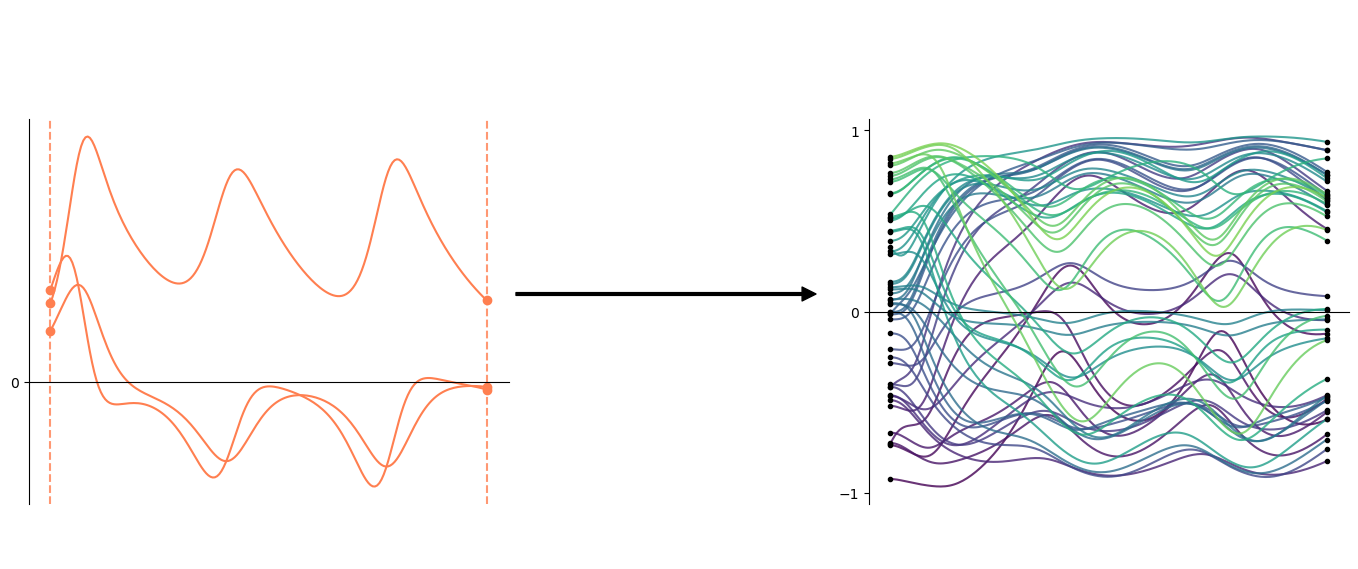

In [44]:
# Figure
fig = plt.figure(figsize=(12,5.5))



# Set up input signal
ax_sig = fig.add_axes([0.0, 0.1, 0.4, 0.7])
ax_sig.set_xticks([])
ax_sig.set_yticks([0])
# ax_sig.set_ylim(-100,105)

# Set up responses
ax_res = fig.add_axes([0.7, 0.1, 0.4, 0.7])
ax_res.set_xticks([])
ax_res.set_yticks([-1,0,1])

# Set up overlay w/text params
ax_overlay = fig.add_axes([0, 0, 1, 1])
ax_overlay.axis([0,1,0,1])
ax_overlay.axis('off')





# Plot input signal
ax_sig.plot(tr_t, tr_U, color='coral')
ax_sig.scatter([tr_t[0]]*3, tr_U[0], color='coral')
ax_sig.scatter([tr_t[-1]]*3, tr_U[-1], color='coral')

ax_sig.axvline(
            tr_t[0], 
            ymin=0, ymax=1,
            color='coral', linestyle='--', alpha=0.8, 
        )

ax_sig.axvline(
            tr_t[-1], 
            ymin=0, ymax=1,
            color='coral', linestyle='--', alpha=0.8, 
        )



ax_sig.spines['top'].set_visible(False)
ax_sig.spines['right'].set_visible(False)
ax_sig.spines['bottom'].set_position('zero')
    
# Plot reservoir states
order = np.argsort(res_signal[0])
for i,c in enumerate(plt.get_cmap('viridis')(np.linspace(0,0.8,res_sz))):
    ax_res.plot(tr_t, res_signal[:, order[i]], '-', color=c, alpha=0.8)
ax_res.plot([tr_t[0]]*res_sz, res_signal[0], 'k.')
ax_res.plot([tr_t[-1]]*res_sz, res_signal[-1], 'k.')

ax_res.spines['top'].set_visible(False)
ax_res.spines['right'].set_visible(False)
ax_res.spines['bottom'].set_position('zero')

    
    
# Plot arrows
ax_overlay.annotate('', xy=(0.68, 0.5), xytext=(0.43, 0.5),
    **arrow_params
)
    
    
    
# Plot labels
"""ax_overlay.text(0.22, 0.02, r'$\mathbf{u}(t) \in \mathbb{R}^{m}$', **labelparams)
ax_overlay.text(0.57, 0.53, r'$A \in \mathbb{R}^{n \times n}$', **labelparams)
ax_overlay.text(0.92, 0.02, r'$\mathbf{r}(t) \in \mathbb{R}^{n}$', **labelparams)

ax_overlay.text(0.09, 0.87, r'$\mathbf{u}(0)$', **tickparams)
ax_overlay.text(0.44, 0.87, r'$\mathbf{u}(T)$', **tickparams)
ax_overlay.text(0.86, 0.87, r'$\mathbf{r}(0) = \mathbf{r}_0$', **tickparams)
ax_overlay.text(1.11, 0.87, r'$\mathbf{r}(T)$', **tickparams)"""
    
    
# Show plot
# plt.savefig('wa_fig1.png')
plt.show()

# Fig 2

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

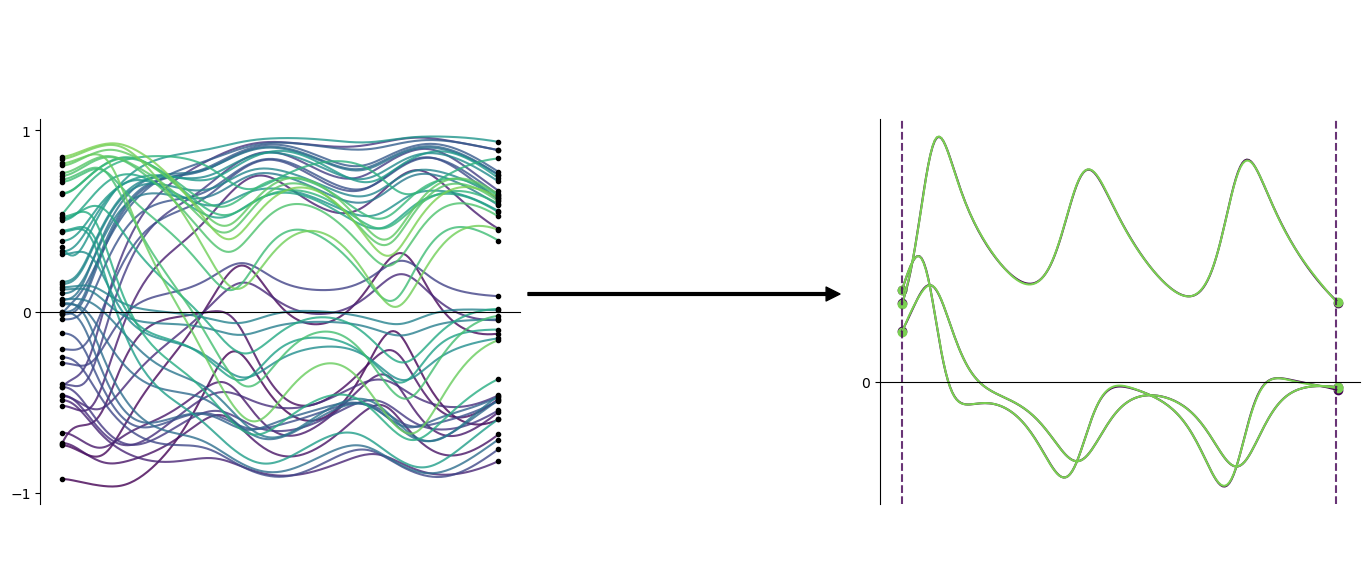

In [45]:
# Figure
fig2 = plt.figure(figsize=(12,5.5))

# Set up input signal
ax_res2 = fig2.add_axes([0.0, 0.1, 0.4, 0.7])
ax_res2.set_xticks([])
ax_res2.set_yticks([-1,0,1])

# Set up responses
ax_agg2 = fig2.add_axes([0.7, 0.1, 0.4, 0.7])
ax_agg2.set_xticks([])
ax_agg2.set_yticks([0])

# Set up overlay w/text params
ax_overlay = fig2.add_axes([0, 0, 1, 1])
ax_overlay.axis([0,1,0,1])
ax_overlay.axis('off')



# Plot reservoir states
order = np.argsort(res_signal[0])
for i,c in enumerate(plt.get_cmap('viridis')(np.linspace(0,0.8,res_sz))):
    ax_res2.plot(tr_t, res_signal[:, order[i]], '-', color=c, alpha=0.8)
ax_res2.plot([tr_t[0]]*res_sz, res_signal[0], 'k.')
ax_res2.plot([tr_t[-1]]*res_sz, res_signal[-1], 'k.')

ax_res2.spines['top'].set_visible(False)
ax_res2.spines['right'].set_visible(False)
ax_res2.spines['bottom'].set_position('zero')

# Plot reconstruction
start = 0
ax_agg2.plot(t[900+start:1100], U[900+start:1100], color=plt.get_cmap('viridis')(0))
ax_agg2.plot(t[900+start:1100], U_hat[start:,], color=plt.get_cmap('viridis')(0.8))
ax_agg2.scatter([t[900+start]]*3, U[900+start], color=plt.get_cmap('viridis')(0))
ax_agg2.scatter([t[1100]]*3, U[1100], color=plt.get_cmap('viridis')(0))
ax_agg2.scatter([t[900+start]]*3, U_hat[start], color=plt.get_cmap('viridis')(0.8))
ax_agg2.scatter([t[1100]]*3, U_hat[199], color=plt.get_cmap('viridis')(0.8))

ax_agg2.spines['top'].set_visible(False)
ax_agg2.spines['right'].set_visible(False)
ax_agg2.spines['bottom'].set_position('zero')

ax_agg2.axvline(
            tr_t[0], 
            ymin=0, ymax=1,
            color=plt.get_cmap('viridis')(0.8), linestyle='--', alpha=0.8, 
        )

ax_agg2.axvline(
            tr_t[-1], 
            ymin=0, ymax=1,
            color=plt.get_cmap('viridis')(0.8), linestyle='--', alpha=0.8, 
        )



# Plot arrows
ax_overlay.annotate('', xy=(0.7, 0.5), xytext=(0.44, 0.5),
    **arrow_params
)
   
    
    
# Plot labels
"""
ax_overlay.text(0.22, 0.02, r'$\mathbf{r}(t) \in \mathbb{R}^{n}$', **labelparams)
ax_overlay.text(0.54, 0.55, r'$W_{out} \in \mathbb{R}^{m \times n}$', **labelparams)
ax_overlay.text(0.92, 0.02, r'$\mathbf{\hat{u}}(t) = W_{out}\mathbf{r}(t) \in \mathbb{R}^{m}$', **labelparams)


ax_overlay.text(0.18, 0.87, r'$\mathbf{r}(0) = \mathbf{r}_0$', **tickparams)
ax_overlay.text(0.45, 0.87, r'$\mathbf{r}(T)$', **tickparams)
ax_overlay.text(0.8, 0.87, r'$\mathbf{\hat{u}}(0)$', **tickparams)
ax_overlay.text(1.15, 0.87, r'$\mathbf{\hat{u}}(T)$', **tickparams)"""

        
# plt.savefig('wa_fig2.png')
plt.show()



# Fig 3

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

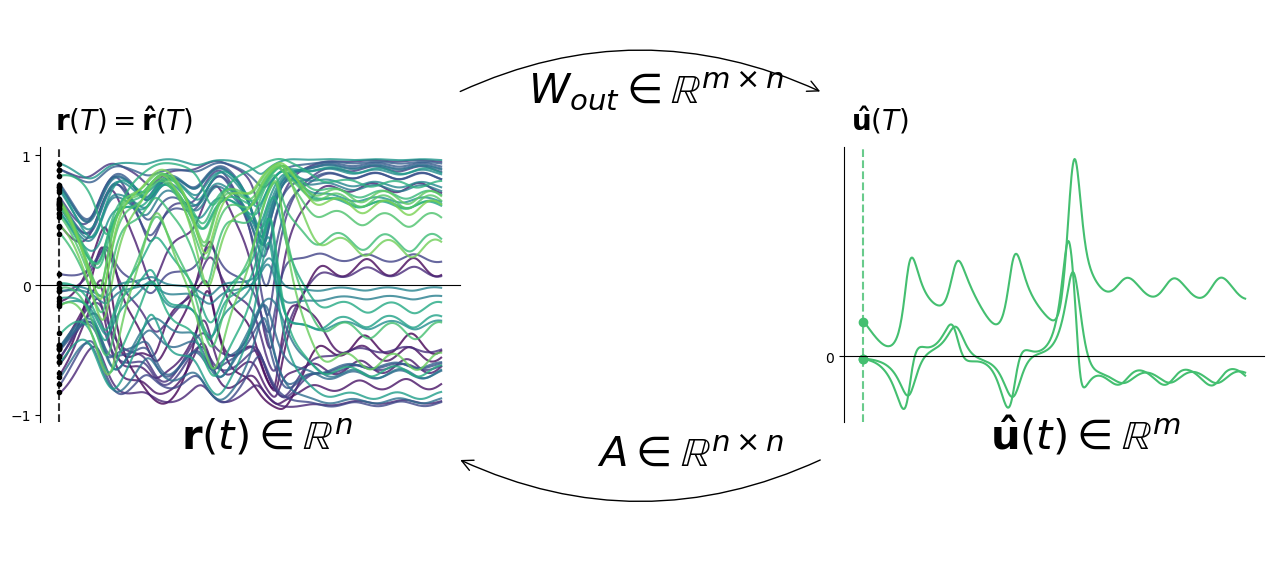

In [9]:
# Figure
fig3 = plt.figure(figsize=(12,5.5))



# Set up reservoir
ax_res3 = fig3.add_axes([0., 0.25, 0.35, 0.5])
ax_res3.set_xticks([])
ax_res3.set_yticks([-1,0,1])

# Set pred
ax_pred3 = fig3.add_axes([0.67, 0.25, 0.35, 0.5])
ax_pred3.set_xticks([])
ax_pred3.set_yticks([0])

# Set up overlay w/text params
ax_overlay = fig3.add_axes([0, 0, 1, 1])
ax_overlay.axis([0,1,0,1])
ax_overlay.axis('off')



# Plot reservoir states
order = np.argsort(res_signal[0])
for i,c in enumerate(plt.get_cmap('viridis')(np.linspace(0,0.8,res_sz))):
    ax_res3.plot(pred_t, pred_states[:, order[i]], '-', color=c, alpha=0.8)
ax_res3.plot([tr_t[-1]]*res_sz, res_signal[-1], 'k.')

ax_res3.spines['top'].set_visible(False)
ax_res3.spines['right'].set_visible(False)
ax_res3.spines['bottom'].set_position('zero')

ax_res3.axvline(
            tr_t[-1], 
            ymin=0, ymax=1,
            color='k', linestyle='--', alpha=0.8, 
        )


# Plot reconstructed
start = 0
ax_pred3.plot(pred_t, pred_res, color=plt.get_cmap('viridis')(0.7))
ax_pred3.scatter([t[1100]]*3, U_hat[199], color=plt.get_cmap('viridis')(0.7))

ax_pred3.axvline(
            tr_t[-1], 
            ymin=0, ymax=1,
            color=plt.get_cmap('viridis')(0.7), linestyle='--', alpha=0.8, 
        )

ax_pred3.spines['top'].set_visible(False)
ax_pred3.spines['right'].set_visible(False)
ax_pred3.spines['bottom'].set_position('zero')


# Plot arrows
path_t = np.linspace(-1,1,3)
path_x = 0.5 + path_t * 0.15
path_y = 0.15*(1-path_t**2)
codes = [
    matplotlib.path.Path.MOVETO
] + [
    matplotlib.path.Path.CURVE3
] * (len(path_t) - 1)

path1 = matplotlib.path.Path(np.column_stack((path_x, 0.85+path_y)), codes=codes)
path2 = matplotlib.path.Path(np.column_stack((path_x, 0.18-path_y)), codes=codes)

ax_overlay.add_patch(matplotlib.patches.FancyArrowPatch(path=path1, arrowstyle="->", mutation_scale=20.))
ax_overlay.add_patch(matplotlib.patches.FancyArrowPatch(path=path2, arrowstyle="<-", mutation_scale=20.))

textparams = {
    'fontsize': 18,
    'horizontalalignment': 'center',
    'transform': ax_overlay.transAxes,
}

tickparams2 = {
    'fontsize': 20,
    'horizontalalignment': 'center',
    'transform': ax_overlay.transAxes,
}
    
        
# Plot labels
ax_overlay.text(0.26, 0.2, r'$\mathbf{r}(t) \in \mathbb{R}^{n}$', **tickparams)
ax_overlay.text(0.95, 0.2, r'$\mathbf{\hat{u}}(t) \in \mathbb{R}^{m}$', **tickparams)

ax_overlay.text(0.62, 0.83, r'$W_{out} \in \mathbb{R}^{m \times n}$', **tickparams)
ax_overlay.text(0.62, 0.17, r'$A \in \mathbb{R}^{n \times n}$', **tickparams)

ax_overlay.text(0.07, 0.78, r'$\mathbf{r}(T) = \mathbf{\hat{r}}(T)$', **tickparams2)
ax_overlay.text(0.7, 0.78, r'$\mathbf{\hat{u}}(T)$', **tickparams2)




# plt.savefig('wa_fig3.png')
plt.show()

# Fig 4

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

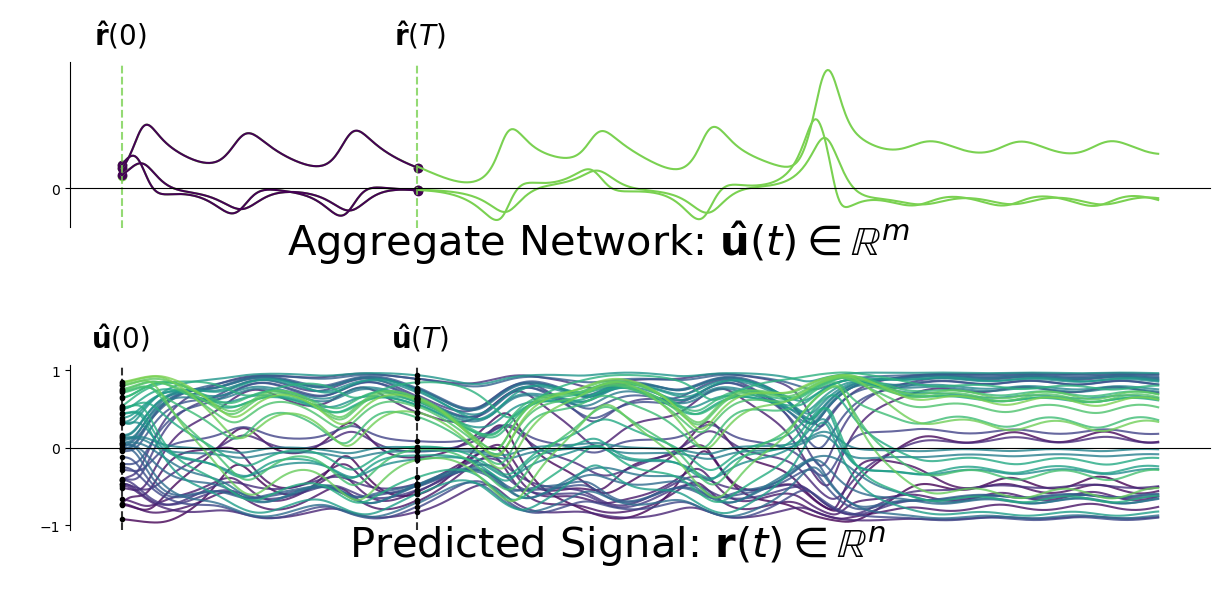

In [29]:
# Figure
fig4 = plt.figure(figsize=(12,5.5))



# Set up reservoir
ax_res4 = fig4.add_axes([0.05, 0.1, 0.95, 0.3])
ax_res4.set_xticks([])
ax_res4.set_yticks([-1,0,1])

# Set pred
ax_pred4 = fig4.add_axes([0.05, 0.65, 0.95, 0.3])
ax_pred4.set_xticks([])
ax_pred4.set_yticks([0])

# Set up overlay w/text params
ax_overlay = fig4.add_axes([0, 0, 1, 1])
ax_overlay.axis([0,1,0,1])
ax_overlay.axis('off')



# Plot reservoir states
order = np.argsort(res_signal[0])
for i,c in enumerate(plt.get_cmap('viridis')(np.linspace(0,0.8,res_sz))):
    ax_res4.plot(tr_t, res_signal[:, order[i]], '-', color=c, alpha=0.8)
    ax_res4.plot(pred_t, pred_states[:, order[i]], '-', color=c, alpha=0.8)
ax_res4.plot([tr_t[0]]*res_sz, res_signal[0], 'k.')
ax_res4.plot([tr_t[-1]]*res_sz, res_signal[-1], 'k.')

ax_res4.spines['top'].set_visible(False)
ax_res4.spines['right'].set_visible(False)
ax_res4.spines['bottom'].set_position('zero')

ax_res4.axvline(
            tr_t[0], 
            ymin=0, ymax=1,
            color='k', linestyle='--', alpha=0.8, 
        )

ax_res4.axvline(
            tr_t[-1], 
            ymin=0, ymax=1,
            color='k', linestyle='--', alpha=0.8, 
        )


# Plot reconstructed
start = 0
ax_pred4.plot(t[900+start:1100], U_hat[start:,], color=plt.get_cmap('viridis')(0.8))
ax_pred4.plot(pred_t, pred_res, color=plt.get_cmap('viridis')(0.8))
ax_pred4.plot(t[900+start:1100], U[900+start:1100], color=plt.get_cmap('viridis')(0))

ax_pred4.axvline(
            tr_t[0], 
            ymin=0, ymax=1,
            color=plt.get_cmap('viridis')(0.8), linestyle='--', alpha=0.8, 
        )

ax_pred4.axvline(
            tr_t[-1], 
            ymin=0, ymax=1,
            color=plt.get_cmap('viridis')(0.8), linestyle='--', alpha=0.8, 
        )

ax_pred4.scatter([t[900+start]]*3, U_hat[start], color=plt.get_cmap('viridis')(0.8))
ax_pred4.scatter([t[1100]]*3, U_hat[199], color=plt.get_cmap('viridis')(0.8))
ax_pred4.scatter([t[900+start]]*3, U[900+start], color=plt.get_cmap('viridis')(0))
ax_pred4.scatter([t[1100]]*3, U[1100], color=plt.get_cmap('viridis')(0))


ax_pred4.spines['top'].set_visible(False)
ax_pred4.spines['right'].set_visible(False)
ax_pred4.spines['bottom'].set_position('zero')



# Plot labels
ax_overlay.text(0.75, 0.6, r'Aggregate Network: $\mathbf{\hat{u}}(t) \in \mathbb{R}^{m}$', **tickparams)
ax_overlay.text(0.73, 0.05, r'Predicted Signal: $\mathbf{r}(t) \in \mathbb{R}^{n}$', **tickparams)

ax_overlay.text(0.1, 1, r'$\mathbf{\hat{r}}(0)$', **tickparams2)
ax_overlay.text(0.1, 0.45, r'$\mathbf{\hat{u}}(0)$', **tickparams2)

ax_overlay.text(0.35, 1, r'$\mathbf{\hat{r}}(T)$', **tickparams2)
ax_overlay.text(0.35, 0.45, r'$\mathbf{\hat{u}}(T)$', **tickparams2)


# plt.savefig('wa_fig4.png')
plt.show()